In [1]:
import mastermat

First, you would make the master matrix by making a meta-manager which knows about the location of each PSF, and then using these locations in combination with the PSFs to do a singular value decomposition thereof. Normalizing the results of the singular value decomposition, you would get a matrix of kernels and a matrix of weights, which, when multiplied together, should give a matrix whose columns can be shifted up and down to make the final mastermat.

This is intended to be run once,

In [2]:
# row_inds_csr, col_inds_csr, values_csr, row_inds, col_inds, values = mastermat.load_memmaps((800,1280))

In [3]:
# row_ins_csr, col_inds_csr, values_csr = mastermat.compute_csr(row_inds, col_inds, values)

In [4]:
# import numpy as np
# np.save("row_inds_csr.npy", row_inds_csr)
# np.save("col_inds_csr.npy", col_inds_csr)
# np.save("values_csr.npy", values_csr) 

In [5]:
# row_inds_csr, col_inds_csr, values_csr = mastermat.load_csr_files()
# savepath = ("row_inds_lin_csr.npy", "col_inds_lin_csr.npy", "values_lin_csr.npy")
# savepath = ("row_inds_cub_csr.npy", "col_inds_cub_csr.npy", "values_cub_csr.npy")
# savepath = ("row_inds_lin_circ_csr.npy", "col_inds_lin_circ_csr.npy", "values_lin_circ_csr.npy")
# savepath = ("row_inds_diy_csr.npy", "col_inds_diy_csr.npy", "values_diy_csr.npy")
# savepath = ("row_inds_fm3_csr.npy", "col_inds_fm3_csr.npy", "values_fm3_csr.npy")
# savepath = ("row_inds_curve_csr.npy", "col_inds_curve_csr.npy", "values_curve_csr.npy")
# savepath = ("row_inds_curve2_csr.npy", "col_inds_curve2_csr.npy", "values_curve2_csr.npy")
# savepath = ("row_inds_hd_nearest_csr.npy", "col_inds_hd_nearest_csr.npy", "values_hd_nearest_csr.npy")
# savepath = ("row_inds_hd_csr.npy", "col_inds_hd_csr.npy", "values_hd_csr.npy")
# savepath = ("row_inds_curve_nearest_csr.npy", "col_inds_curve_nearest_csr.npy", "values_curve_nearest_csr.npy")
# savepath = ("row_inds_probe_csr.npy", "col_inds_probe_csr.npy", "values_probe_csr.npy")
# savepath = ("row_inds_probe_green_csr.npy", "col_inds_probe_green_csr.npy", "values_probe_green_csr.npy")
# savepath = ("row_inds_probe_undistorted_depth3_csr.npy", "col_inds_probe_undistorted_depth3_csr.npy", "values_probe_undistorted_depth3_csr.npy")
# savepath = ("row_inds_probe_undistorted_depth2_csr.npy", "col_inds_probe_undistorted_depth2_csr.npy", "values_probe_undistorted_depth2_csr.npy")
savepath = ("row_inds_probe_green_undistorted_csr.npy", "col_inds_probe_green_undistorted_csr.npy", "values_probe_green_undistorted_csr.npy")
row_inds_csr, col_inds_csr, values_csr = mastermat.load_csr_files(csr_paths=savepath)

In [6]:
values_csr.shape

(507557736,)

In [7]:
row_inds_csr.shape

(1023878,)

In [8]:
import matplotlib as mpl
# mpl.rc('image', cmap='inferno')
mpl.rc('image', cmap='viridis')

In [9]:
import numpy as np

row_inds_csr_expanded = np.empty(1024001)
row_inds_csr_expanded[:row_inds_csr.shape[0]] = row_inds_csr
row_inds_csr_expanded[row_inds_csr.shape[0]:] = row_inds_csr[-1]

In [10]:
import scipy
mastermat_csr = scipy.sparse.csr_matrix((values_csr, col_inds_csr, row_inds_csr_expanded), shape=(1024000, 1024000))

In [11]:
mastermat_csr.shape

(1024000, 1024000)

In [12]:
np.max(mastermat_csr.data)

0.11419766709874124

In [13]:
mastermat_csr.getnnz()

507557736

We're now trying to test this mastermat. To do this, make an appropriately-sized vector of ones, then matrix-multiply it with mastermat

In [14]:
onesvec = np.ones(mastermat_csr.shape[1])

In [15]:
ones_sim = mastermat_csr.dot(onesvec)

In [16]:
mastermat_csr.indptr[83]

1

In [17]:
np.bincount(mastermat_csr.indptr)

array([  1, 239,   1, ...,   0,   0, 124])

In [18]:
np.arange(mastermat_csr.shape[0])[ones_sim > 0]

array([    239,     240,     241, ..., 1022593, 1022594, 1022595])

In [19]:
ones_sim.reshape((800,1280))

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [20]:
big_inds = np.arange(ones_sim.shape[0])[ones_sim > 10]

In [21]:
import imageio
import cv2

In [22]:
img_resized = imageio.imread("../data/nV3_resized/1.png")

/tmp/ipykernel_2898546/2906533047.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_resized = imageio.imread("../data/nV3_resized/1.png")


In [23]:
img_resized.shape

(800, 1280)

In [24]:
mastermat_csr.shape

(1024000, 1024000)

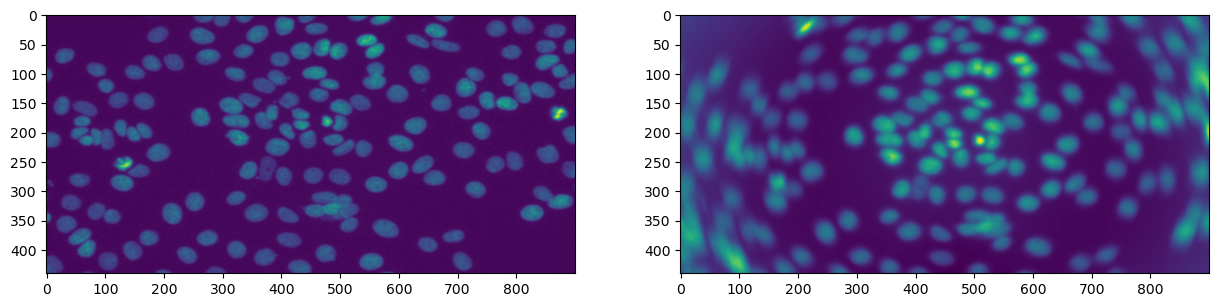

In [25]:
from matplotlib import pyplot as plt
import pdb
fig, axs = plt.subplots(1, 2, figsize=(15,15))
axs[0].imshow(img_resized[200:640,200:1100])
axs[1].imshow(mastermat.simulate_image(img_resized, mastermat_csr)[200:640,200:1100])

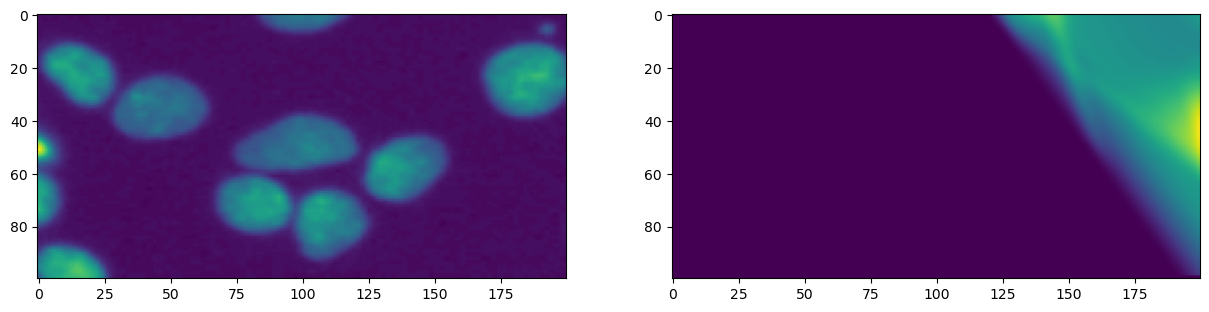

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(15,15))
axs[0].imshow(img_resized[700:,:200])
axs[1].imshow(mastermat.simulate_image(img_resized, mastermat_csr)[700:,:200])

In [27]:
%time
simmed_img = mastermat.simulate_image(img_resized, mastermat_csr)
# simmed_img[simmed_img > 50] = 0

CPU times: user 1 µs, sys: 3 µs, total: 4 µs
Wall time: 9.78 µs


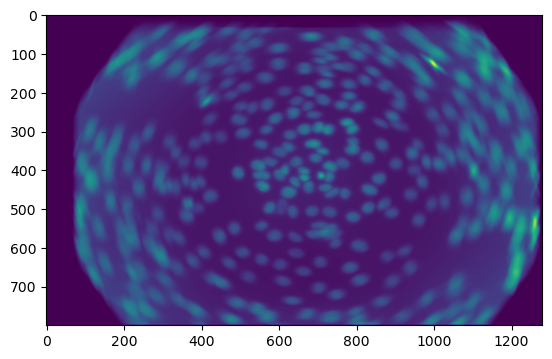

In [28]:
plt.imshow(simmed_img)

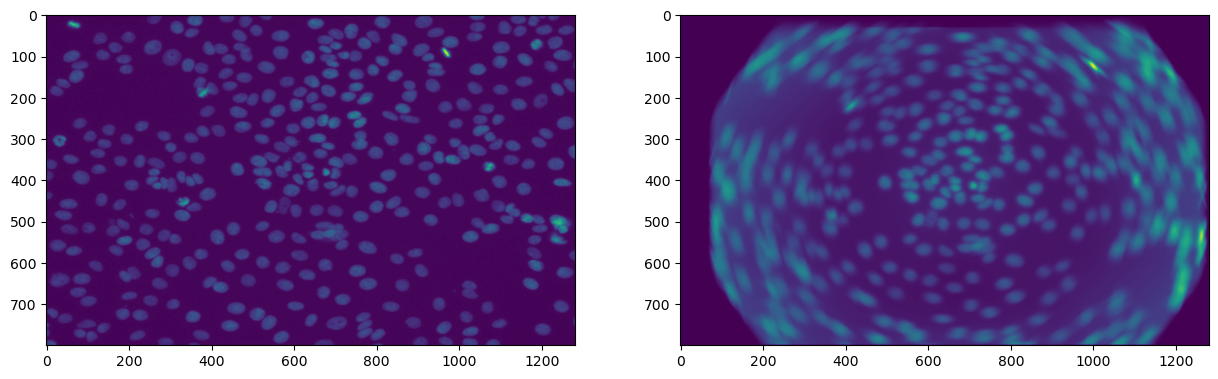

In [29]:
fig, axs = plt.subplots(1, 2, figsize=(15,15))
axs[0].imshow(img_resized)
axs[1].imshow(simmed_img)

In [30]:
np.max(img_resized)

248

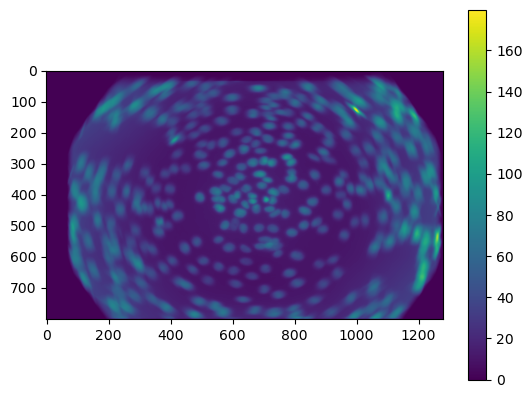

In [31]:
plt.imshow(simmed_img)
plt.colorbar()

In [32]:
np.arange(ones_sim.shape[0])[ones_sim > 10]

array([], dtype=int64)

In [33]:
ones_sim

array([0., 0., 0., ..., 0., 0., 0.])

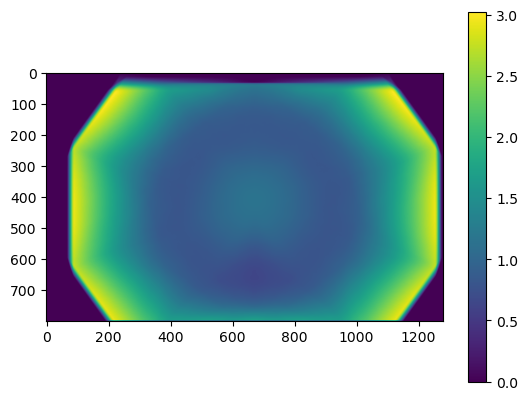

In [34]:
plt.imshow(mastermat.simulate_image(np.ones((800,1280)), mastermat_csr))
plt.colorbar()

In [35]:
mastermat_csr.indptr[200*1280 + 200 + 1] - mastermat_csr.indptr[200*1280 + 200]

800

Above shows that 47 pixels contribute to the value of the simulated image at pixel 40000, but in reality the value at that point is:

In [36]:
ones_sim[200*1280 + 200]

2.2802854202688954

In [37]:
ones_sim[ones_sim > 0].shape

(898250,)

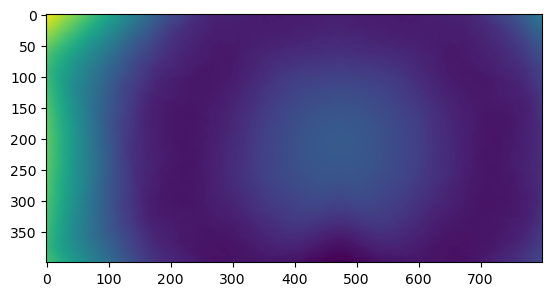

In [38]:
plt.imshow((ones_sim).reshape((800,1280))[200:600, 200:1000])

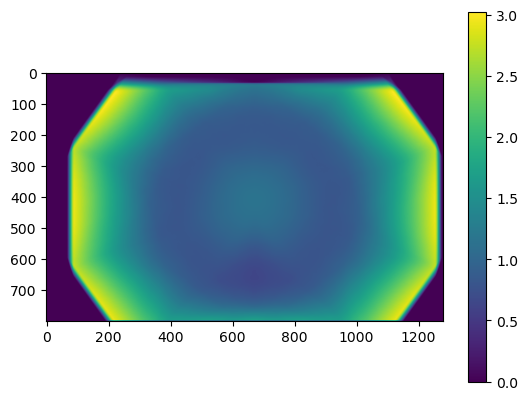

In [39]:
# plt.imshow((ones_sim*(ones_sim < 1)).reshape((800,1280)))
# plt.figure(figsize=(80,128))
plt.imshow((ones_sim).reshape((800,1280)))
plt.colorbar()

In [40]:
def um_to_px(x, um_size=640, pixel_size=800):
    return x*pixel_size/um_size

In [41]:
640/800 == 1024/1280

True

In [42]:
640/800

0.8

In [43]:
um_to_px(3)

3.75

In [44]:
def draw_circle(radius):
    canvas = np.zeros((2*np.ceil(radius).astype(int), 2*np.ceil(radius).astype(int)))
    Xq, Yq = np.meshgrid(np.arange(radius*2), np.arange(radius*2))
    rad_to_point = (Xq - radius)**2 + (Yq - radius)**2
    canvas = rad_to_point < radius**2
    return canvas

In [45]:
6*.8

4.800000000000001

In [46]:
def grid_of_circles(r, num_x, num_y, img_dims=(800,1280)):
    circle_obj = np.zeros(img_dims)
    for circ_row in range(1,num_y):
        for circ_col in range(1,num_x):
            circ_center = (circ_row*img_dims[0]//num_y, circ_col*img_dims[1]//num_x)
            circle_drawing = draw_circle(r)
            circle_obj[circ_center[0]-np.floor(circle_drawing.shape[0]/2).astype(int)\
                       :circ_center[0]+np.ceil(circle_drawing.shape[0]/2).astype(int), \
                       circ_center[1]-np.floor(circle_drawing.shape[1]/2).astype(int)\
                       :circ_center[1]+np.ceil(circle_drawing.shape[1]/2).astype(int)] = circle_drawing
    return circle_obj

In [47]:
img_dims = (800, 1280)
# circle_obj = np.zeros(img_dims)
r = 3


# pdb.set_trace()
num_x = 30
num_y = 30
# for circ_row in range(1,num_y):
#     for circ_col in range(1,num_x):
#         circ_center = (circ_row*img_dims[0]//num_y, circ_col*img_dims[1]//num_x)
#         circle_obj[circ_center[0]-r:circ_center[0]+r, circ_center[1]-r:circ_center[1]+r] = draw_circle(r)[:,:]

In [48]:
circle_obj = grid_of_circles(um_to_px(r), num_x, num_y, img_dims=(800,1280))

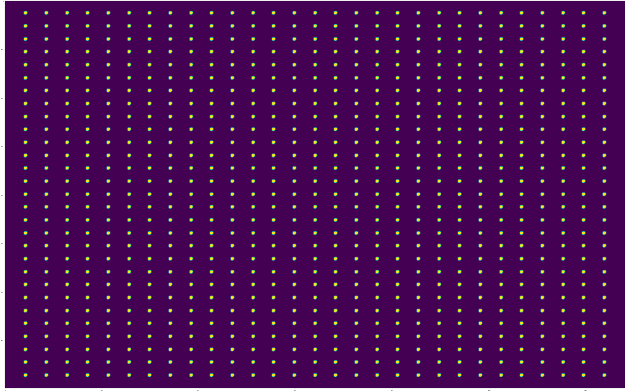

In [49]:
plt.figure(figsize=(80,128), dpi=10)
plt.imshow(circle_obj)

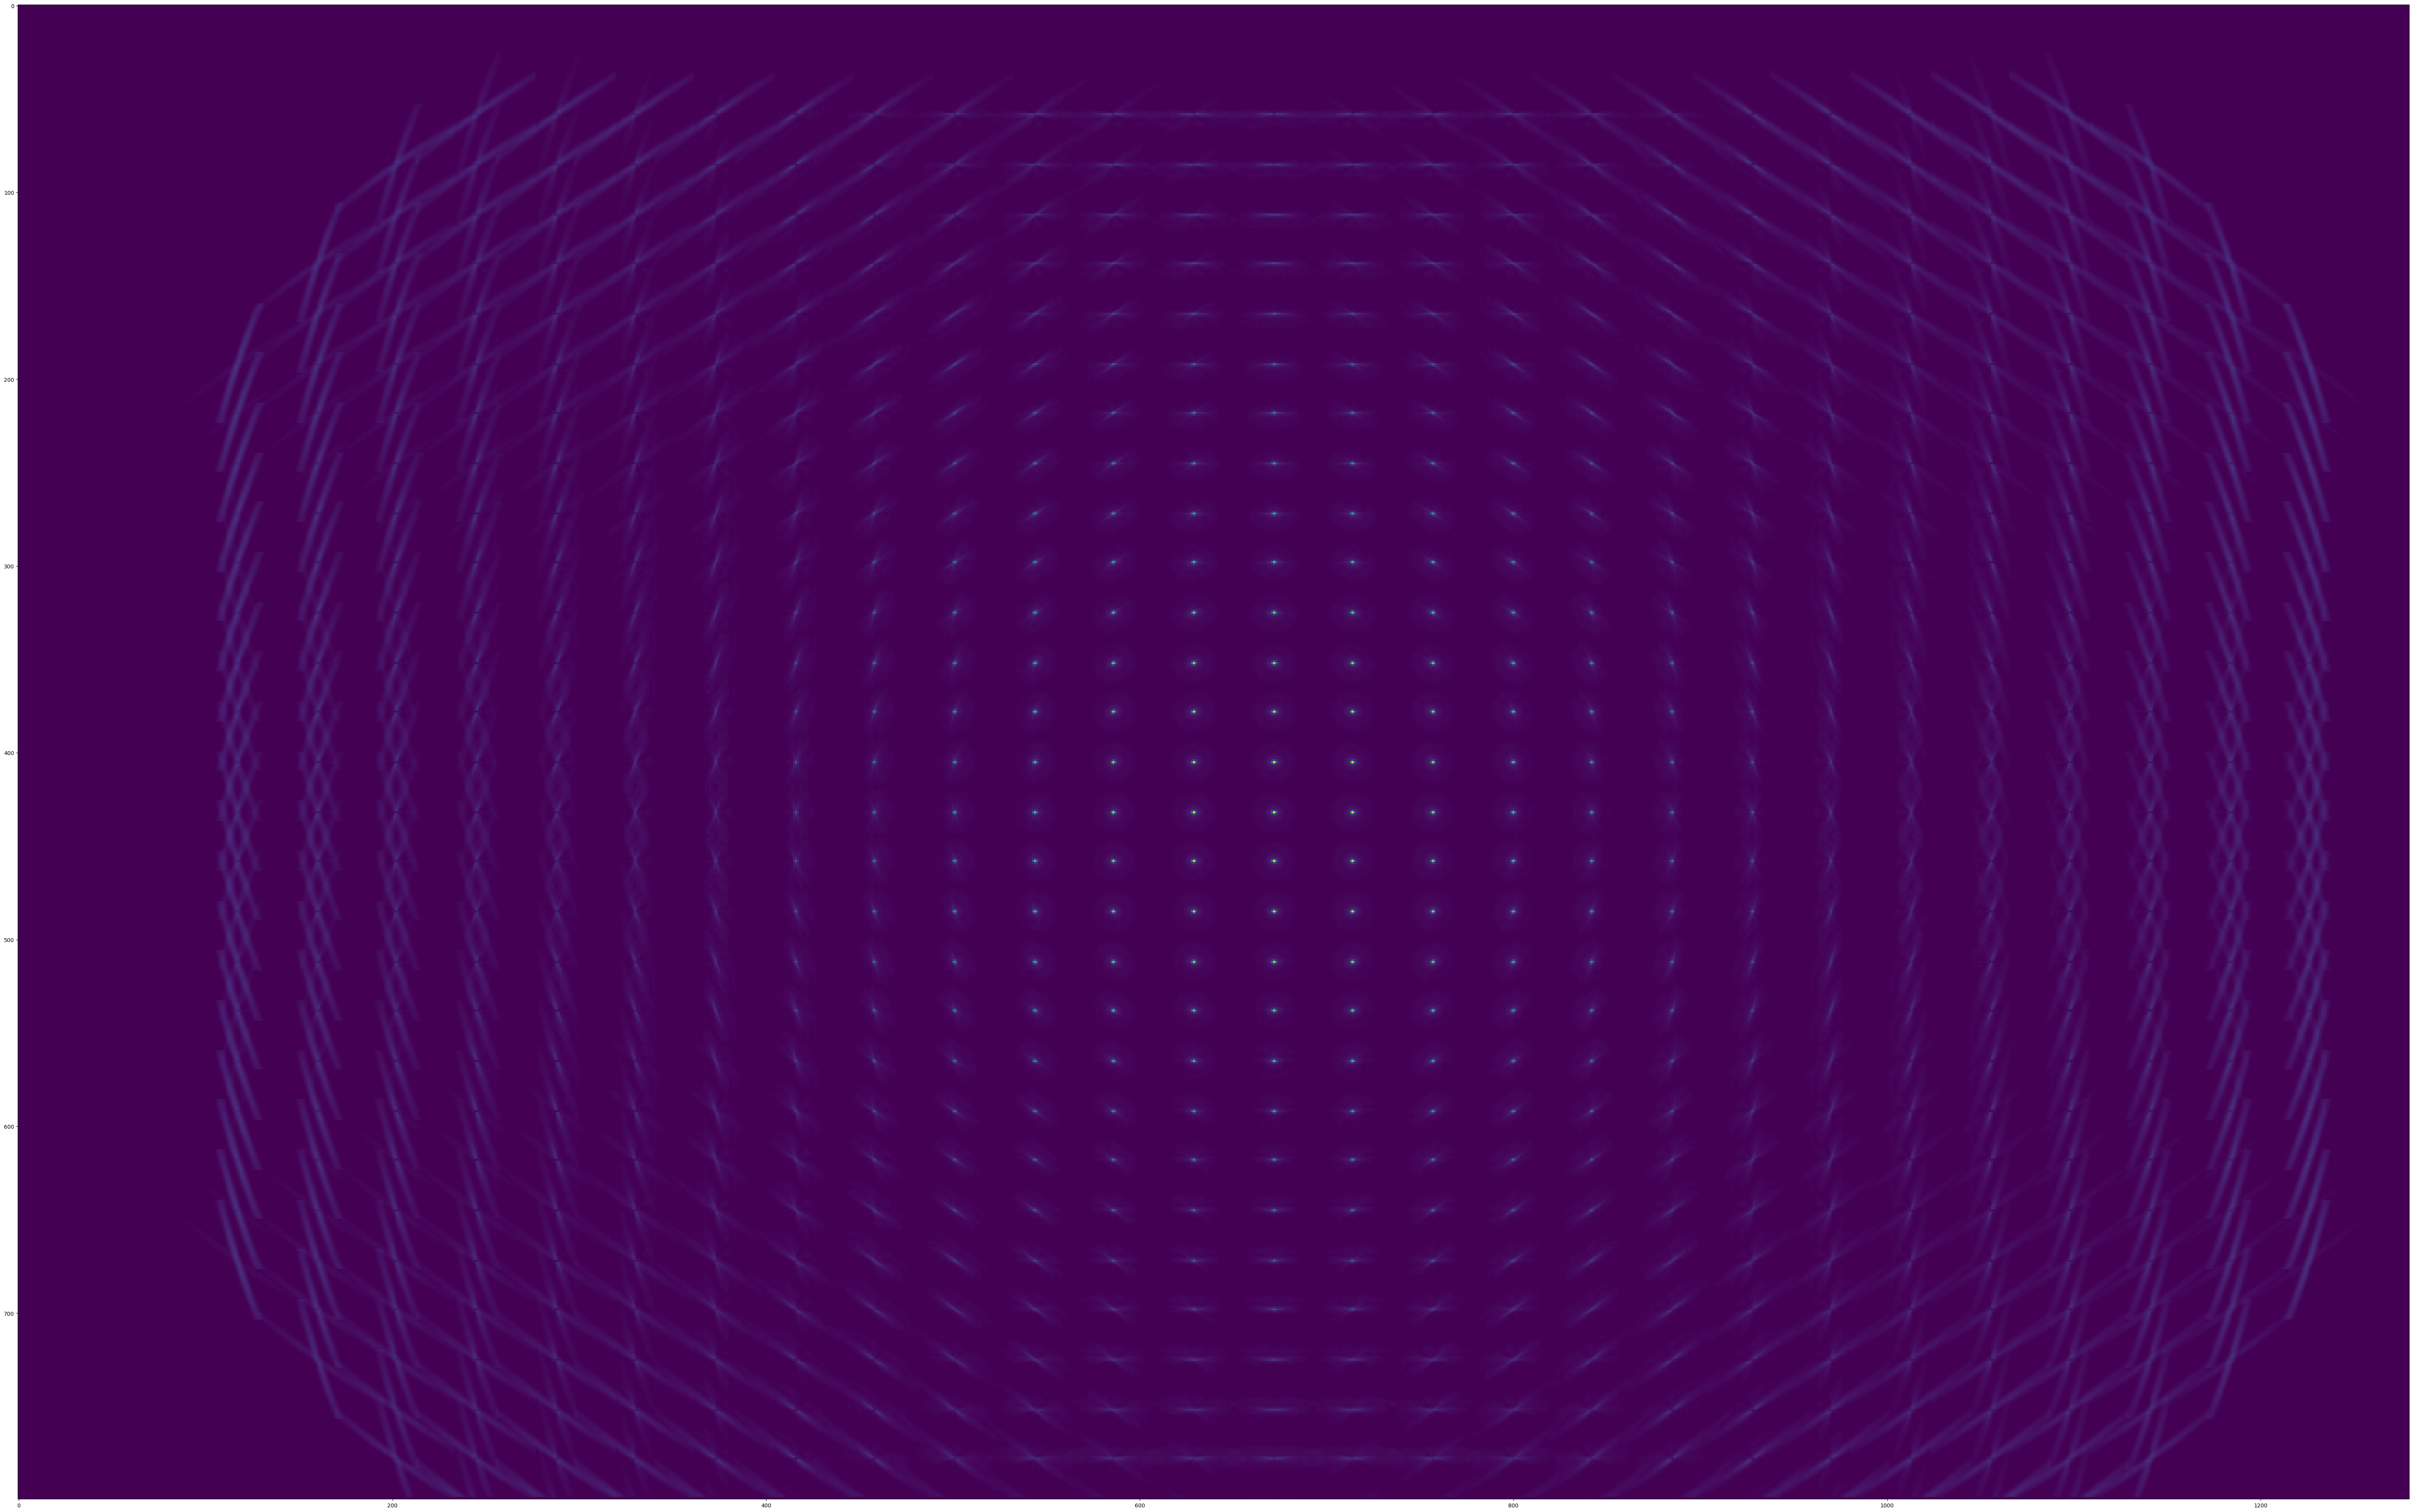

In [50]:
plt.figure(figsize=(80,128))
plt.imshow(mastermat.simulate_image(grid_of_circles(1, num_x, num_y, img_dims=(800,1280)), mastermat_csr))

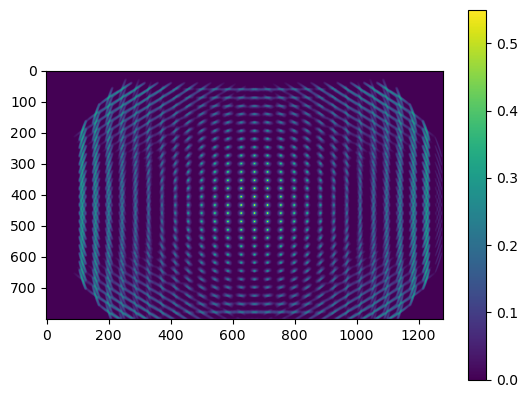

In [51]:
# plt.figure(figsize=(80,128))
plt.imshow(mastermat.simulate_image(circle_obj, mastermat_csr))
plt.colorbar()

## examining the locations of the sampled PSFs
I now want to just simulate an image with circles at the points where I am sampling my PSFs from (the origins of the fields).

In [52]:
import one_shot_svd
# this is the metafile for the curved object
metaman = one_shot_svd.load_metaman("/home/dshteinbok/nV3_PSFs_flat_meta/metafile.csv")

In [53]:
# circle_drawing = draw_circle(5)
circle_drawing = draw_circle(um_to_px(3))

In [54]:
circle_drawing.shape

(8, 8)

In [55]:
blank_field = np.zeros((800,1280))
for origin in metaman.field_origins.values():
    location_px = [int(um_to_px(origin[1]))+400, int(um_to_px(origin[0]))+640]
#     print("In um: ", origin)
#     print("In px: ", location_px)
    if location_px[0] > 800 or location_px[1] > 1280 or location_px[0] < 0 or location_px[1] < 0:
#         print("skipping field!")
        continue
    blank_field[(location_px[0]-circle_drawing.shape[0]//2):(location_px[0]+circle_drawing.shape[0]//2), (location_px[1]-circle_drawing.shape[1]//2):(location_px[1]+circle_drawing.shape[1]//2)] = circle_drawing[:,:]

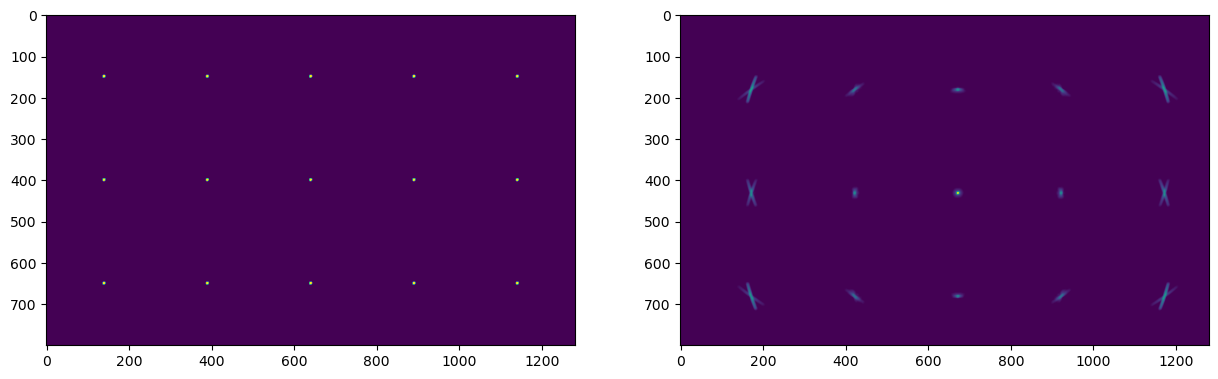

In [56]:
fig, axs = plt.subplots(1, 2, figsize=(15,15))
axs[0].imshow(blank_field)
axs[1].imshow(mastermat.simulate_image(blank_field, mastermat_csr))

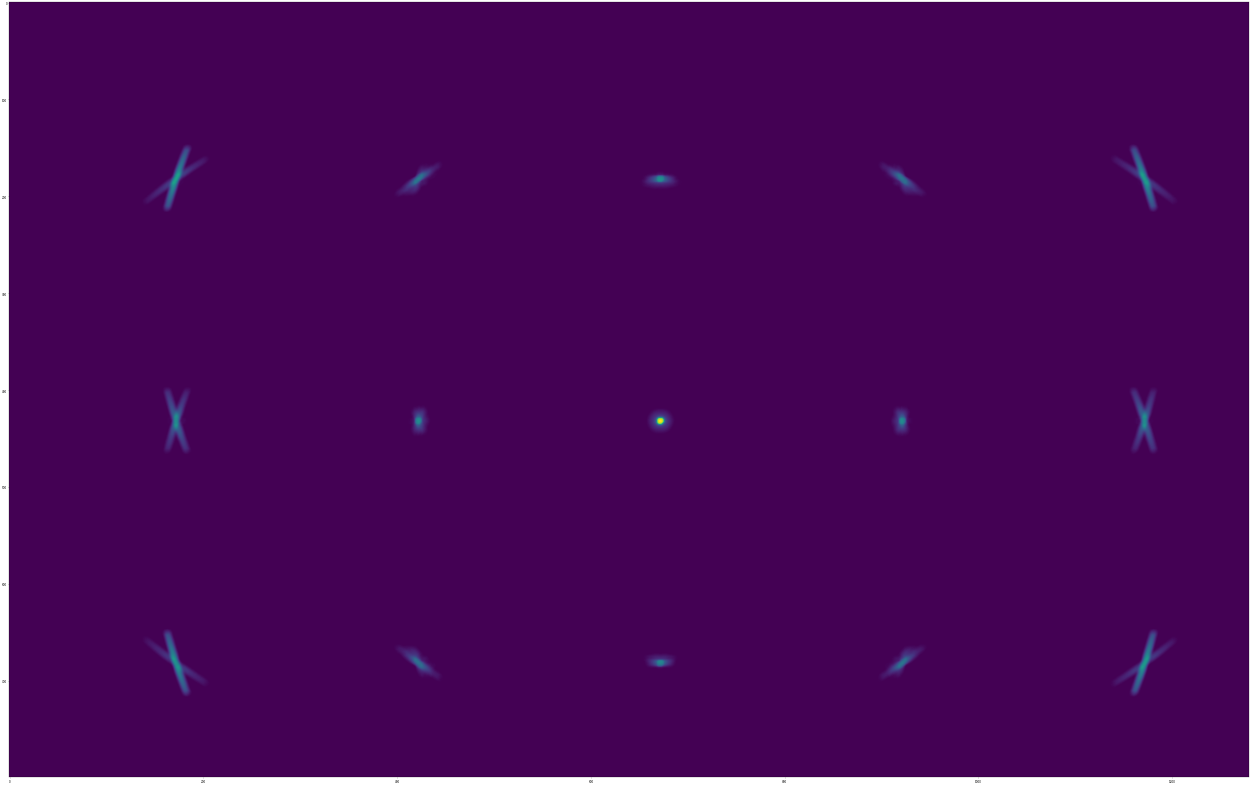

In [57]:
plt.figure(figsize=(80,128), dpi=20)
plt.imshow(mastermat.simulate_image(blank_field, mastermat_csr))

In [58]:
plt.figure?

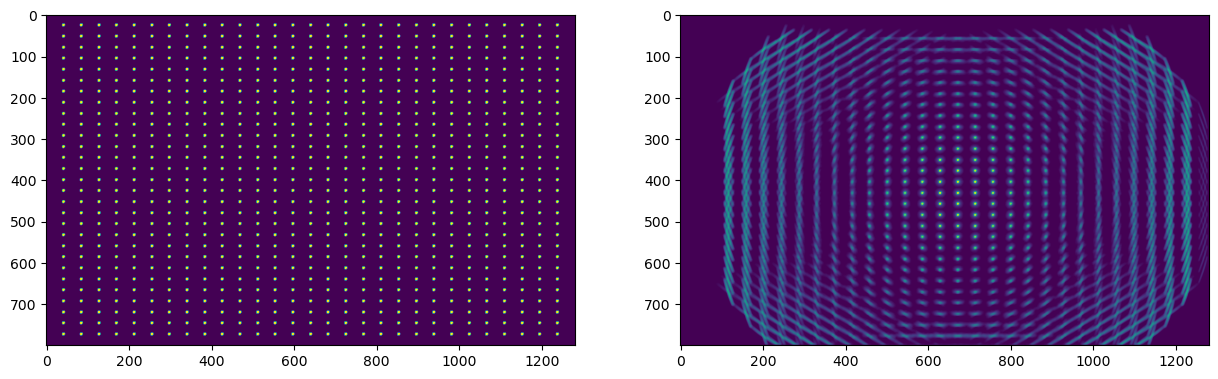

In [59]:
fig, axs = plt.subplots(1, 2, figsize=(15,15))
axs[0].imshow(circle_obj)
axs[1].imshow(mastermat.simulate_image(circle_obj, mastermat_csr))

In [60]:
big_circle_obj = np.zeros((800, 1280))
r = 10

# pdb.set_trace()

for circ_row in range(1,10):
    for circ_col in range(1,10):
        circ_center = (circ_row*80, circ_col*128)
        big_circle_obj[circ_center[0]-r:circ_center[0]+r, circ_center[1]-r:circ_center[1]+r] = draw_circle(r)[:,:]

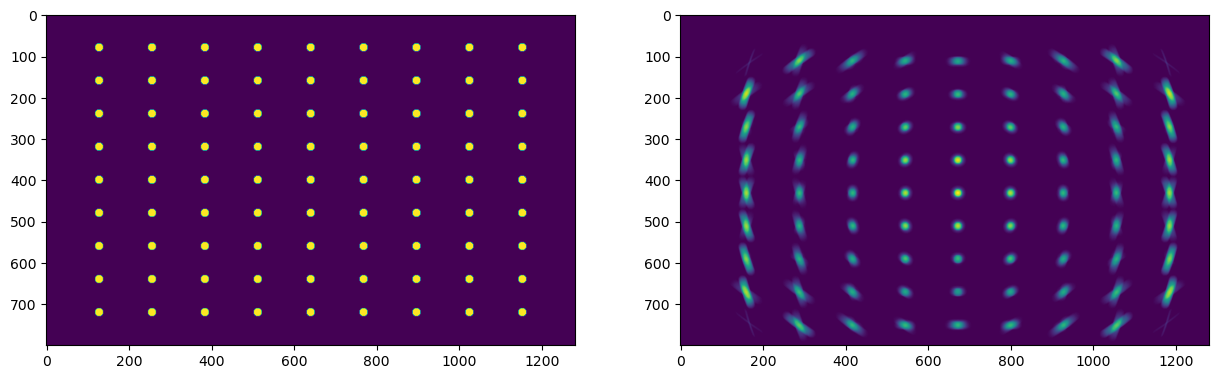

In [61]:
fig, axs = plt.subplots(1, 2, figsize=(15,15))
axs[0].imshow(big_circle_obj)
axs[1].imshow(mastermat.simulate_image(big_circle_obj, mastermat_csr))

In [62]:
grid_img = np.zeros((800, 1280))

r = 2

# pdb.set_trace()

for line_row in range(80,800,80):
#     print("line row: ", line_row)
    grid_img[line_row-r:line_row + r,:] = 1
for line_col in range(128,1280,128):
    print("line col: ", line_col)
    grid_img[:,line_col-r:line_col+r] = 1
    pass

line col:  128
line col:  256
line col:  384
line col:  512
line col:  640
line col:  768
line col:  896
line col:  1024
line col:  1152


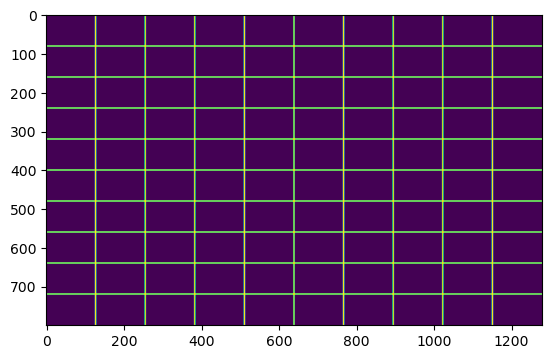

In [63]:
plt.imshow(grid_img)

In [64]:
range?

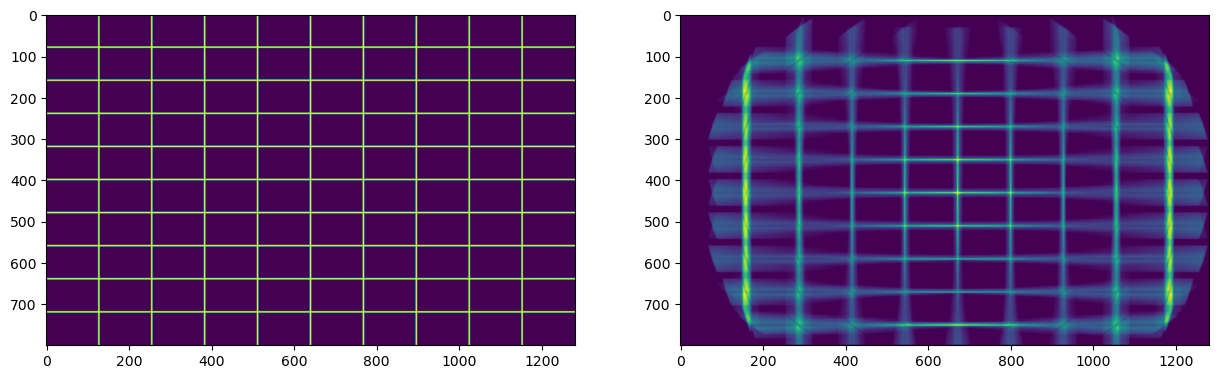

In [65]:
fig, axs = plt.subplots(1, 2, figsize=(15,15))
axs[0].imshow(grid_img)
axs[1].imshow(mastermat.simulate_image(grid_img, mastermat_csr))

In [66]:
# savepath = ("row_inds_cub_csr.npy", "col_inds_cub_csr.npy", "values_cub_csr.npy")
savepath_lin = ("row_inds_lin_csr.npy", "col_inds_lin_csr.npy", "values_lin_csr.npy")
row_inds_lin_csr, col_inds_lin_csr, values_lin_csr = mastermat.load_csr_files(csr_paths=savepath_lin)

In [67]:
row_inds_csr_lin_expanded = np.empty(1024001)
row_inds_csr_lin_expanded[:row_inds_lin_csr.shape[0]] = row_inds_lin_csr
row_inds_csr_lin_expanded[row_inds_lin_csr.shape[0]:] = row_inds_lin_csr[-1]

In [68]:
mastermat_csr_lin = scipy.sparse.csr_matrix((values_lin_csr, col_inds_lin_csr, row_inds_csr_lin_expanded), shape=(1024000, 1024000))

In [69]:
# plt.imshow((mastermat_csr_lin.dot(onesvec) - mastermat_csr.dot(onesvec)).reshape((800,1280)))
# plt.colorbar()

In [70]:
f_img = np.zeros((800,1280))
fht = 5
fhh = 300
f_img[400-fhh:400+fhh,640-fht:640+fht] = 1
f_img[400-fhh:400-fhh+2*fht,640:1000] = 1
f_img[300-fht:300+fht,640:900] = 1

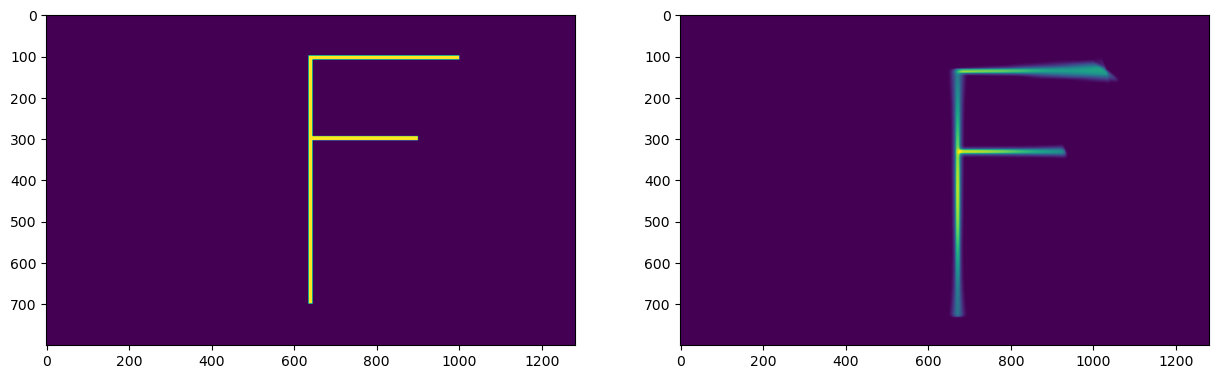

In [71]:
fig, axs = plt.subplots(1, 2, figsize=(15,15))
axs[0].imshow(f_img)
axs[1].imshow(mastermat.simulate_image(f_img, mastermat_csr))

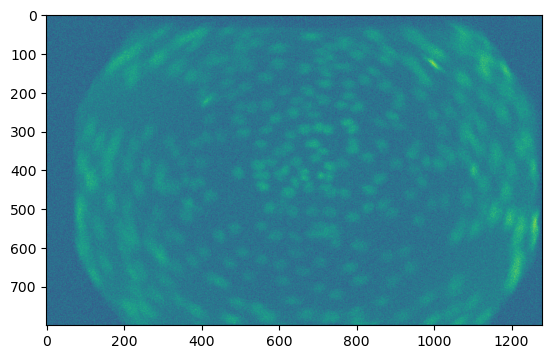

In [72]:
simmed_noisy = simmed_img + np.random.normal(0, 28, simmed_img.shape)
plt.imshow(simmed_noisy)

In [73]:
np.asarray(list(metaman.field_origins.values()))

array([[ 200.,    0.],
       [ 400.,    0.],
       [ 600.,    0.],
       [ 200., -200.],
       [ 400., -200.],
       [ 200., -400.],
       [ 400., -400.],
       [ 200.,  200.],
       [ 400.,  200.],
       [ 200.,  400.],
       [ 400.,  400.],
       [-200.,    0.],
       [-400.,    0.],
       [-600.,    0.],
       [-200., -200.],
       [-400., -200.],
       [-200., -400.],
       [-400., -400.],
       [-200.,  200.],
       [-400.,  200.],
       [-200.,  400.],
       [-400.,  400.],
       [   0.,    0.],
       [   0.,  200.],
       [   0.,  400.],
       [   0.,  600.],
       [   0., -200.],
       [   0., -400.],
       [   0., -600.]])

In [74]:
xq = np.arange(-img_dims[1]//2, img_dims[1]//2)
yq = np.arange(-img_dims[0]//2, img_dims[0]//2)

[Xq, Yq] = np.meshgrid(xq, yq)
print(Xq.shape)

(800, 1280)


In [75]:
scipy.interpolate.griddata?

In [76]:
# points.shape

NameError: name 'points' is not defined

In [ ]:
640/800

In [77]:
# we need a grid of ones within the FOV and zeros without
points = np.asarray(list(metaman.field_origins.values()))
visible_mask = ~np.isnan(scipy.interpolate.griddata(points, np.ones(points.shape[0]), (Xq, Yq), method="linear"))

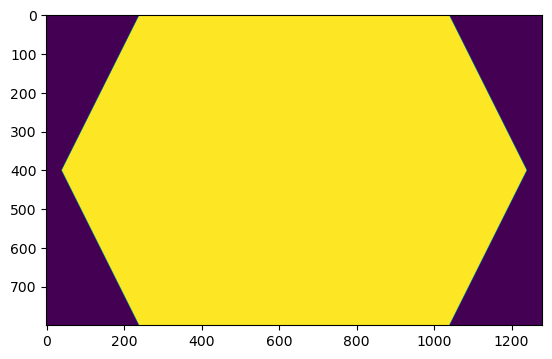

In [78]:
plt.imshow(visible_mask)

In [81]:
empirical_mask = mastermat.simulate_image(np.ones((800, 1280)), mastermat_csr) > 0

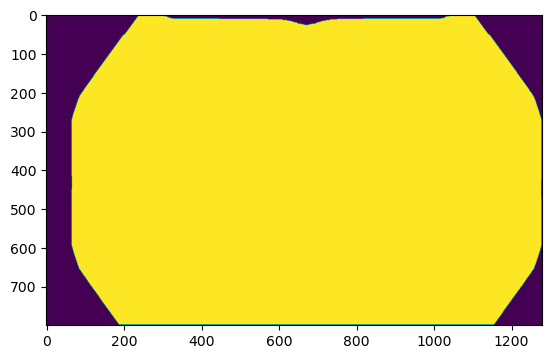

In [80]:
plt.imshow(mastermat.simulate_image(np.ones((800, 1280)), mastermat_csr) > 0)

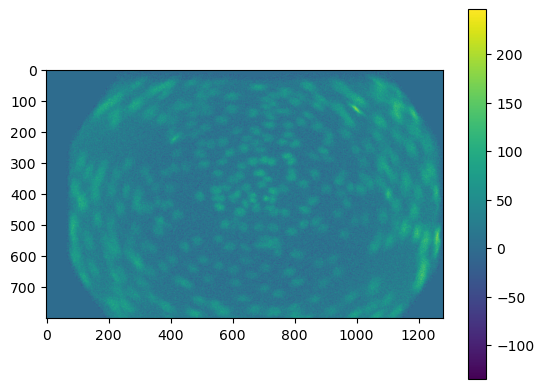

In [82]:
plt.imshow(simmed_noisy*empirical_mask)
# plt.imshow(simmed_noisy)
plt.colorbar()

In [ ]:
np.max(simmed_img)

In [ ]:
np.max(simmed_noisy)